In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convenience Functions

In [2]:
def load_profile(profile_number, logs_dir):
    prof = pd.read_table(
        os.path.join(logs_dir, 'profile' + str(profile_number) + '.data'), 
        skiprows=5, sep='\s+')
    return prof

In [3]:
def load_history_file(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'history.data'),
                         skiprows=5, sep='\s+')

In [4]:
def get_index(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'profiles.index'), 
        names=['model_number', 'priority', 'profile_number'],
        skiprows=1, sep='\s+')

In [80]:
def plot_composition(profile,elements_dict):
    prof = profile
    for element in elements_dict.keys():
        plt.plot(prof.mass,elements_dict[element],label=element)
    plt.yscale('log')
    plt.ylim(bottom=10**-14)
    plt.legend(bbox_to_anchor=(1,0),loc='lower left')#,bbox_inches='tight')
    plt.title('Composition')
    plt.xlabel(r'Mass Coordinate')
    plt.ylabel(r'log(mass fraction)')
    plt.show()

# He-WD Progenitor

In [111]:
logs_dir = os.path.join('../progenitors/rcbnet_hewd/', 'LOGS')
logs_dir

'../progenitors/rcbnet_hewd/LOGS'

In [112]:
hist = load_history_file(logs_dir)
hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,2035,2.087584e+06,6.319644,0.15,32.474597,-99.0,0.0,1.0,1.000000,...,5.286515e-20,0.990277,0.000048,0.000244,0.000047,0.000327,0.000556,0.147984,0,3
1,10,1718,2.476227e+07,6.423163,0.15,32.474597,-99.0,0.0,1.0,1.000000,...,1.943433e-20,0.990277,0.000048,0.000244,0.000047,0.000327,0.000553,0.147988,0,3
2,20,1707,5.388680e+07,6.464238,0.15,32.474597,-99.0,0.0,1.0,1.000000,...,6.040498e-21,0.990277,0.000048,0.000244,0.000047,0.000327,0.000548,0.147993,0,3
3,30,1690,8.696911e+07,6.557192,0.15,32.474597,-99.0,0.0,1.0,1.000000,...,1.872010e-21,0.990277,0.000048,0.000244,0.000047,0.000327,0.000544,0.147997,0,4
4,40,1678,1.260024e+08,6.586004,0.15,32.474597,-99.0,0.0,1.0,1.000000,...,5.430728e-22,0.990277,0.000048,0.000244,0.000047,0.000327,0.000540,0.148001,0,4
5,50,1666,1.695881e+08,6.678187,0.15,32.474597,-99.0,0.0,1.0,0.999999,...,1.498418e-22,0.990277,0.000048,0.000244,0.000047,0.000327,0.000537,0.148004,0,4
6,60,1651,2.221248e+08,6.724393,0.15,32.474597,-99.0,0.0,1.0,0.999995,...,3.427520e-23,0.990277,0.000048,0.000244,0.000047,0.000327,0.000534,0.148007,0,4
7,70,1643,2.841810e+08,6.844103,0.15,32.474597,-99.0,0.0,1.0,0.999984,...,6.793083e-24,0.990277,0.000048,0.000244,0.000047,0.000327,0.000532,0.148009,0,3
8,80,1648,3.648334e+08,6.929537,0.15,32.474597,-99.0,0.0,1.0,0.999965,...,1.123631e-24,0.990277,0.000048,0.000244,0.000047,0.000327,0.000529,0.148011,0,3
9,90,1652,4.763150e+08,7.158537,0.15,32.474597,-99.0,0.0,1.0,0.999938,...,2.057806e-25,0.990277,0.000048,0.000244,0.000047,0.000327,0.000526,0.148014,0,3


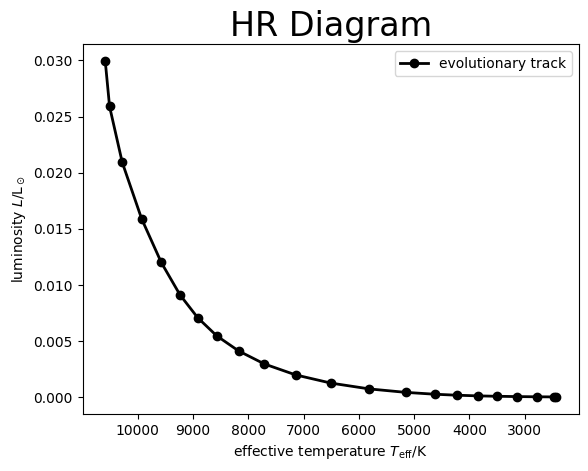

In [113]:
plt.plot(10**hist['log_Teff'][1:], 
         10**hist['log_L'][1:], 
         lw=2, c='k', marker='o', label='evolutionary track')

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [106]:
# np.sort(os.listdir(logs_dir))

In [114]:
index = get_index(logs_dir)
index

,model_number,priority,profile_number
0,100,1,1
1,200,1,2
2,212,3,3


In [115]:
prof = load_profile(3,logs_dir)

In [118]:
# element_value_list = [prof.h1.values, prof.he3.values, prof.he4.values, prof.c12.values, 
#                 prof.n14.values, prof.o16.values, prof.o18.values, prof.ne20.values, 
#                 prof.ne22.values, prof.mg24.values]
element_value_list = [prof.neut.values,prof.h1.values,prof.h2.values,prof.he3.values,
                prof.he4.values,prof.li7.values,prof.be7.values,
                prof.be9.values,prof.be10.values,prof.b8.values,prof.b11.values,
                prof.c11.values,prof.c12.values,prof.c13.values,prof.c14.values,
               prof.n13.values,prof.n14.values,prof.n15.values,prof.o14.values,
                prof.o15.values,prof.o16.values,prof.o17.values,
                prof.o18.values,prof.f17.values,prof.f18.values,prof.f19.values,
                prof.ne18.values,prof.ne19.values,prof.ne20.values,prof.ne21.values,
               prof.ne22.values,prof.na21.values,prof.na22.values,prof.na23.values,
                prof.na24.values,prof.mg23.values,prof.mg24.values,
                prof.mg25.values,prof.mg26.values,prof.fe56.values]


# elements_dict = {'h1':prof.h1.values, 'he3':prof.he3.values, 'he4':prof.he4.values, 
#                  'c12':prof.c12.values, 'n14':prof.n14.values, 'o16':prof.o16.values, 
#                  'o18':prof.o18.values, 'ne20':prof.ne20.values, 'ne22':prof.ne22.values, 
#                  'mg24':prof.mg24.values}

# element_list = ['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24']
element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

# print(len(element_list))

elements_dict = dict(zip(element_list, element_value_list))
# elements_dict

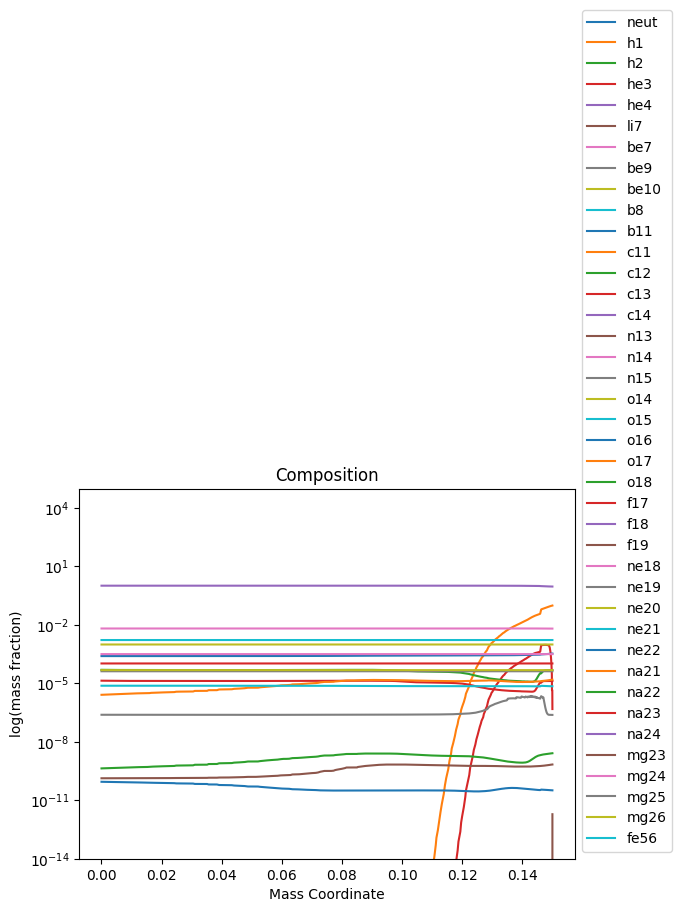

In [119]:
plot_composition(prof,elements_dict)

In [120]:
def mass_averaged_abunds(profile,elements_dict):
    prof = profile
    massfracs_dict = dict.fromkeys(elements_dict.keys())
    total_mass = np.max(prof.mass)
    zone_mass = prof.dm.values / 1.989e33
    print(total_mass)
#     print(zone_mass)
    total_massfrac_sanity = 0
    for element in elements_dict.keys():
        massfraction_perzone = elements_dict[element]
        total_element_mass = 0
        for i in range(0,len(zone_mass)):
            total_element_mass = total_element_mass + (zone_mass[i]*massfraction_perzone[i])
        total_massfrac = total_element_mass/total_mass
        massfracs_dict[element] = total_massfrac
        total_massfrac_sanity = total_massfrac_sanity + total_massfrac
    print(total_massfrac_sanity) # this should be very close to ONE
        
    return massfracs_dict

In [121]:
massfracs_dict = mass_averaged_abunds(prof,elements_dict)
massfracs_dict

0.15
0.9997033035183772


{'neut': 6.644419996926295e-61,
 'h1': 0.0033911384184549483,
 'h2': 2.9094529963168376e-19,
 'he3': 3.413064033386907e-05,
 'he4': 0.9865534828265168,
 'li7': 3.463615846665714e-21,
 'be7': 6.626636070219229e-36,
 'be9': 3.587794935001912e-34,
 'be10': 7.782363447380306e-46,
 'b8': 6.522830598225452e-65,
 'b11': 5.4307223680075826e-30,
 'c11': 1.1796928951411882e-99,
 'c12': 4.083041881304803e-05,
 'c13': 1.1354463044043899e-05,
 'c14': 7.148327260175434e-68,
 'n13': 3.187978374650723e-43,
 'n14': 0.006323628615562663,
 'n15': 4.104518277934477e-07,
 'o14': 5.439048670475899e-86,
 'o15': 1.6789308673954592e-46,
 'o16': 0.000255369807329151,
 'o17': 9.253434858766984e-06,
 'o18': 1.3886090890678122e-09,
 'f17': 8.781896928318441e-53,
 'f18': 2.3558638425487337e-99,
 'f19': 3.676449581091506e-10,
 'ne18': 1.2465563157904321e-99,
 'ne19': 4.621354458480911e-99,
 'ne20': 0.000957513241964395,
 'ne21': 7.193556791980411e-06,
 'ne22': 4.6647987726937176e-11,
 'na21': 1.1025912303526116e-99,

In [28]:
massfracs_dict['h1'] = 0.9862247635268961
massfracs_dict['he4'] = 0.0037083479011538823
massfracs_dict

{'h1': 0.9862247635268961,
 'he3': 4.476336880088616e-05,
 'he4': 0.0037083479011538823,
 'c12': 4.035641601180717e-05,
 'n14': 0.0063322575091982365,
 'o16': 0.0002620496160532149,
 'o18': 1.0556212087998062e-05,
 'ne20': 0.0009642153988465604,
 'ne22': 7.7987503385626e-05,
 'mg24': 0.002038006065942077}

In [16]:
# 7.004545052770011493e-01 (0.70)
# 8.873392958886305827e-05 
# 2.894556372258887400e-01 (0.28)
# 1.621717821051862083e-03 
# 7.346633148323512526e-04 
# 4.553059960063229362e-03 
# 1.055934500851029464e-05 
# 9.645015630668412948e-04 
# 7.801064887067478144e-05 
# 2.038610914627840207e-03



# Creating abund.dat

In [129]:
logs_dir = os.path.join('../RCB_eng_bignet/', 'LOGS')
logs_dir

'../RCB_eng_bignet/LOGS'

In [130]:
hist = load_history_file(logs_dir)
hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,3832,1.000000e+05,5.000000,0.8,33.201596,-99.0,0.003606,1.0,0.971109,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,5
1,5,764,5.243326e+05,5.020290,0.8,33.201596,-99.0,0.000000,1.0,0.993604,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,4
2,10,768,1.460034e+06,5.416196,0.8,33.201596,-99.0,0.000000,1.0,0.997414,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,4
3,15,772,3.788357e+06,5.812102,0.8,33.201596,-99.0,0.000000,1.0,0.999478,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,5
4,20,786,7.374831e+06,5.832838,0.8,33.201596,-99.0,0.000000,1.0,0.999996,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,6
5,25,833,1.050416e+07,5.800319,0.8,33.201596,-99.0,0.000000,1.0,1.000000,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,6
6,30,854,1.437363e+07,5.906982,0.8,33.201596,-99.0,0.000000,1.0,1.000000,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,5
7,35,873,1.901322e+07,6.007478,0.8,33.201596,-99.0,0.000000,1.0,1.000000,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,5
8,40,879,2.476673e+07,6.081045,0.8,33.201596,-99.0,0.000000,1.0,1.000000,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,5
9,45,880,3.197456e+07,6.190165,0.8,33.201596,-99.0,0.000000,1.0,1.000000,...,0.699532,0.280269,0.003341,0.009354,0.003409,0.009354,0.559925,0.224003,0,5


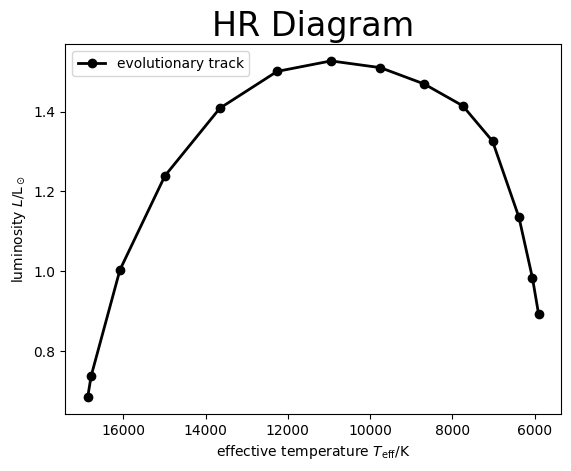

In [131]:
plt.plot(10**hist['log_Teff'][1:], 
         10**hist['log_L'][1:], 
         lw=2, c='k', marker='o', label='evolutionary track')

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [132]:
index = get_index(logs_dir)
index

,model_number,priority,profile_number
0,1,2,1
1,50,1,2
2,66,3,3


In [133]:
prof = load_profile(3,logs_dir)
prof

,zone,mass,logR,logT,logRho,logP,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals,dm,...,mg25,mg26,fe56,log_D_mix,log_D_mix_non_rotation,log_D_conv,tau,omega,j_rot,extra_heat
0,1,8.000000e-01,-1.013250,4.293628,-7.514615,4.873915,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,6.666667e-01,0.0,0.0,0.0
1,2,8.000000e-01,-1.013341,4.379724,-7.237434,5.245923,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,3.473428e+00,0.0,0.0,0.0
2,3,8.000000e-01,-1.013389,4.430111,-7.091889,5.443381,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,6.569571e+00,0.0,0.0,0.0
3,4,8.000000e-01,-1.013424,4.466241,-6.993274,5.578659,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,9.879839e+00,0.0,0.0,0.0
4,5,8.000000e-01,-1.013452,4.494679,-6.918981,5.681679,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,1.339212e+01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,1.000058e-06,-3.472715,7.729079,4.567305,20.664903,0.699532,0.280457,0.020011,9.942630e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.913013e+13,0.0,0.0,0.0
877,878,5.000293e-07,-3.573063,7.729084,4.567326,20.664934,0.699532,0.280457,0.020011,4.971315e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.918229e+13,0.0,0.0,0.0
878,879,2.500147e-07,-3.673409,7.729087,4.567339,20.664954,0.699532,0.280457,0.020011,2.485657e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.922368e+13,0.0,0.0,0.0
879,880,1.250074e-07,-3.773755,7.729089,4.567348,20.664966,0.699532,0.280457,0.020011,1.242829e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.925654e+13,0.0,0.0,0.0


In [134]:
# element_value_list = [prof.h1.values, prof.he3.values, prof.he4.values, prof.c12.values, 
#                 prof.n14.values, prof.o16.values, prof.o18.values, prof.ne20.values, 
#                 prof.ne22.values, prof.mg24.values]

# element_list = ['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24']

element_value_list = [prof.neut.values,prof.h1.values,prof.h2.values,prof.he3.values,
                prof.he4.values,prof.li7.values,prof.be7.values,
                prof.be9.values,prof.be10.values,prof.b8.values,prof.b11.values,
                prof.c11.values,prof.c12.values,prof.c13.values,prof.c14.values,
               prof.n13.values,prof.n14.values,prof.n15.values,prof.o14.values,
                prof.o15.values,prof.o16.values,prof.o17.values,
                prof.o18.values,prof.f17.values,prof.f18.values,prof.f19.values,
                prof.ne18.values,prof.ne19.values,prof.ne20.values,prof.ne21.values,
               prof.ne22.values,prof.na21.values,prof.na22.values,prof.na23.values,
                prof.na24.values,prof.mg23.values,prof.mg24.values,
                prof.mg25.values,prof.mg26.values,prof.fe56.values]

element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

elements_dict = dict(zip(element_list, element_value_list))

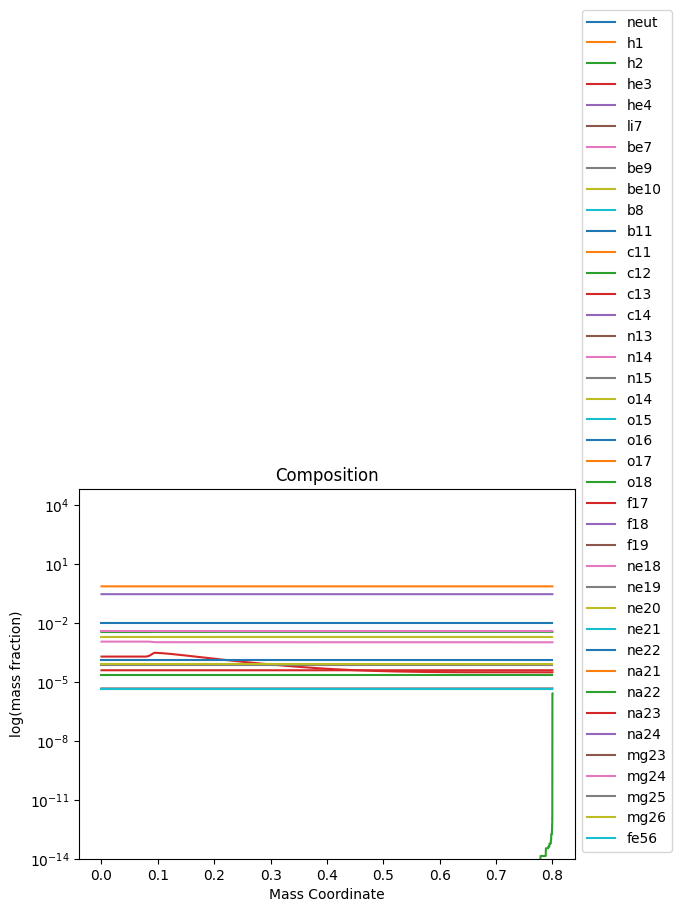

In [135]:
plot_composition(prof,elements_dict)

In [136]:

def create_abund_file(prof,elements_dict,he_progenitor_massfracs):
    logxq = prof.logxq.values
    xq = 10**logxq
    masscoord = prof.mass.values
    print(len(xq))
    print(len(elements_dict.keys()))
    
    output_file = open('../abund.dat','w')
    output_file.write(str(len(xq))+'\t'+str(len(elements_dict.keys()))+'\n')
    
    for i in range(0,len(xq)):
        if masscoord[i] > 0.5:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                write_str = write_str+'\t'+f'{he_progenitor_massfracs[element]:f}'#':.7f}'
            print(write_str)
            output_file.write(write_str+'\n')
        else:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                if element in ['c12','o16']:
                    write_str = write_str+'\t'+str(0.5)
                else:
                    write_str = write_str+'\t'+str(0.0)
            print(write_str)
            output_file.write(write_str+'\n')
#             print('interior')
            
    output_file.close()

In [137]:
create_abund_file(prof,elements_dict,massfracs_dict)

881
40
1.0000000000000327e-99	0.0000000	0.0033911	0.0000000	0.0000341	0.9865535	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000408	0.0000114	0.0000000	0.0000000	0.0063236	0.0000004	0.0000000	0.0000000	0.0002554	0.0000093	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0009575	0.0000072	0.0000000	0.0000000	0.0000000	0.0001021	0.0000000	0.0000000	0.0003082	0.0000407	0.0000465	0.0016215
1.562499999995966e-14	0.0000000	0.0033911	0.0000000	0.0000341	0.9865535	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000408	0.0000114	0.0000000	0.0000000	0.0063236	0.0000004	0.0000000	0.0000000	0.0002554	0.0000093	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0009575	0.0000072	0.0000000	0.0000000	0.0000000	0.0001021	0.0000000	0.0000000	0.0003082	0.0000407	0.0000465	0.0016215
3.124999999991933e-14	0.0000000	0.0033911	0.0000000	0.0000341	0.9865535	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000000	0.0000